**2.1 Fourier Series Approximation**

In [45]:
 # Imports
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.fftpack import fft, fftshift, ifft
 from scipy import signal


Q: Taking  = 1 V,  = 1 complete the function ( ) to return the Fourier series 𝐴 𝑇 𝑠 𝑎𝑘
 coefficients of the square wave for given any integer value of .

In [46]:
import numpy as np

# Square pulse function
def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s = 1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s = 0
    return s

# Fourier series coefficients
def a(k):
    if k == 0:
        return 0.5
    a_k = np.sin(k * (np.pi / 2)) / (k * np.pi)
    return a_k


Q: Complete the function fs_approx(t,N) to return the value of a Fourier series
approximated periodic signal, at any given time


In [47]:
def fs_approx(t, N):
    T = 1  # time period
    w0 = 2 * np.pi / T
    x_t = 0
    for i in range(-N, N + 1):
        x_t += (a(i) * np.e ** (1j * i * w0 * t)).real
    return x_t

Q: Update the python script according to the following guidelines.
 1. Create the array t with equally spaced 1000 elements in the interval [−2.5, 2.5]
 2. Use the square(t) function to fill the array x with the values of square wave at each
time instant in the array . 𝑡
3.
 Use the function fs_approx(t,N) to fill the array y with the function values of the
Fourier series approximated square wave.


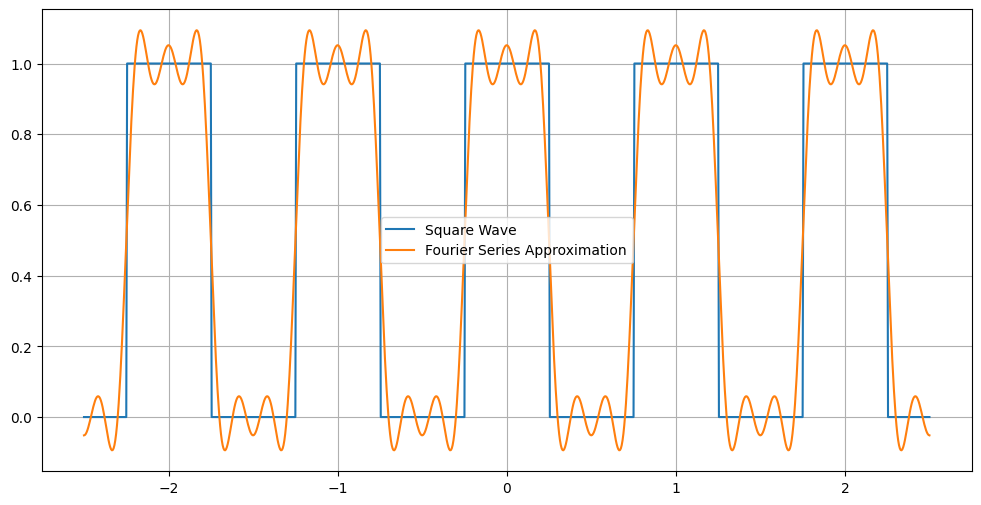

In [48]:
x = []
y = []
N = 5
time = np.arange(-2.5, 2.5 + (5 / 1000), 5 / 1000)

for t in time:
    x.append(square(t))  # Fill in square function for each time t
    y.append(fs_approx(t, N))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time, x, label='Square Wave')
ax.plot(time, y, label='Fourier Series Approximation')
ax.legend()
ax.grid()
plt.show()

Q: Write a Python script to plot the original signal, 𝑥(𝑡) and the approximated signal, 𝑥𝑁(𝑡) in the same
 f
 igure for 𝑁 = 5. [Graded] Q: Plot the original signal, 𝑥(𝑡) and the approximated signal, 𝑥𝑁(𝑡) in the same
 f
 igure for 𝑁 = 50. [Graded] Q: Comment on your observations. ( i.e. for 𝑁 = 5 and 𝑁 = 50)


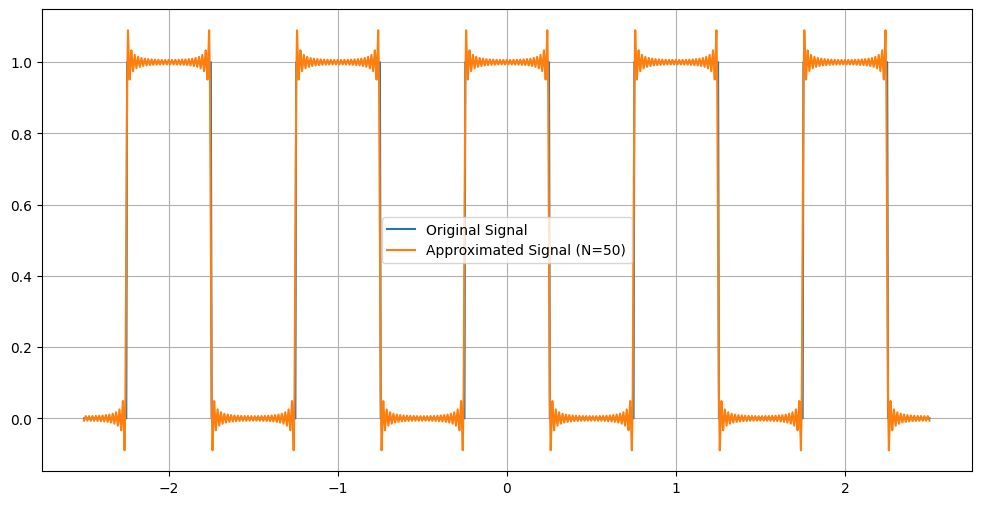

In [49]:
# Initialize lists to store signal values
x1 = []
y1 = []

# Define the value of N
N = 50

# Define the range of time values
time = np.arange(-2.5, 2.5 + 5 / 1000, 5 / 1000)

# Iterate over time values to calculate original and approximated signal values
for t in time:
    x1.append(square(t))  # Compute original signal
    y1.append(fs_approx(t, N))  # Compute approximated signal for N = 50

# Plot the original and approximated signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time, x1, label='Original Signal')
ax.plot(time, y1, label='Approximated Signal (N=50)')
ax.grid()
ax.legend()
plt.show()


2.2 Fourier Series Coefficients

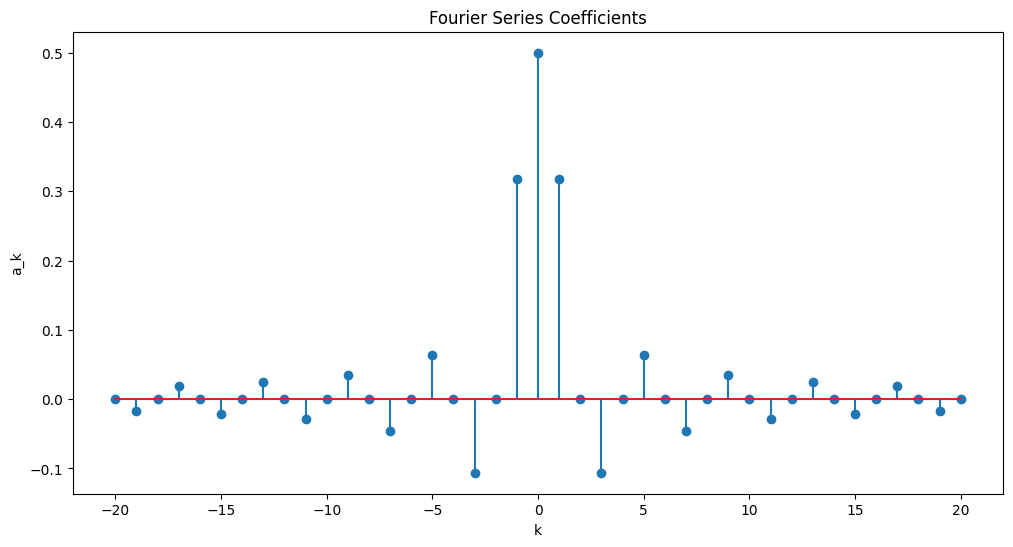

In [50]:
# Define the range of k values
k = np.arange(-20, 20 + 1, 1)

# Initialize a list to store Fourier series coefficients
ak = []

# Calculate Fourier series coefficients for each k value
for i in k:
    ak.append(a(i))

# Create a stem plot to visualize the Fourier series coefficients
fig, ax = plt.subplots(figsize=(12, 6))
ax.stem(k, ak)
ax.set_xlabel('k')
ax.set_ylabel('a_k')
ax.set_title('Fourier Series Coefficients')
plt.show()

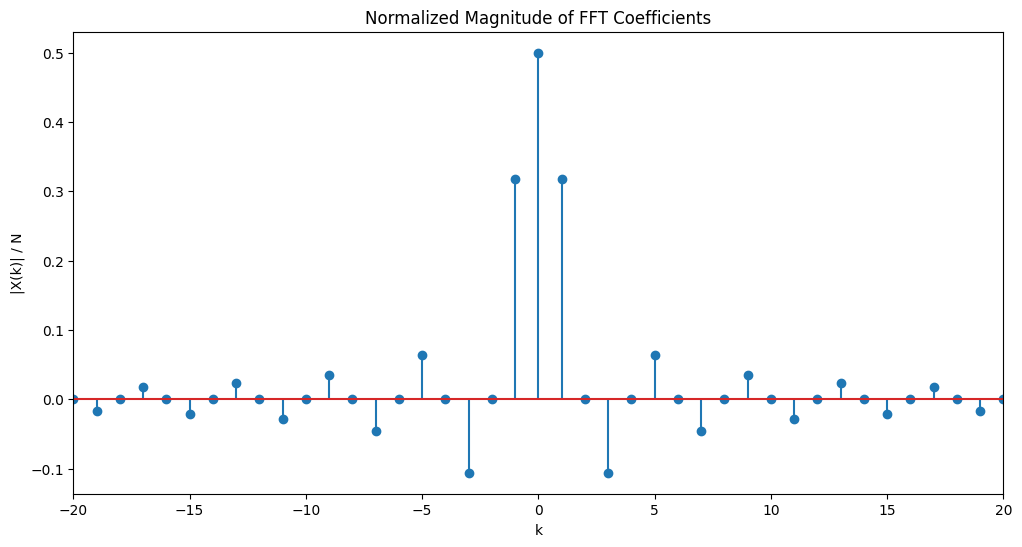

In [51]:
# Define parameters
N = 200  # Number of samples
t = np.linspace(0, 1 - 1 / N, N)  # Time vector
x = []  # Initialize list to store signal values

# Generate the signal x(t)
for i in t:
    x.append(square(i))  # Assuming square(t) is defined elsewhere

# Compute the FFT coefficients
X = fftshift(fft(x))  # Compute FFT and shift zero frequency component to center
X_norm = X.real / N  # Normalize FFT coefficients by N

# Create a frequency axis
k = np.linspace(-N / 2, N / 2 - 1, N)

# Plot the FFT coefficients
fig, ax = plt.subplots(figsize=(12, 6))
ax.stem(k, X_norm)  # Plot the FFT coefficients as a stem plot
ax.set_xlabel('k')  # Set the x-axis label
ax.set_ylabel('|X(k)| / N')  # Set the y-axis label
ax.set_title('Normalized Magnitude of FFT Coefficients')  # Set the title of the plot
ax.set_xlim(-20, 20)  # Set the limit of x-axis for better visualization
plt.show()  # Show the plot

2.3 Ideal Filters and Actual Filters

In [52]:
# Define parameters
w1 = 100 * np.pi
w2 = 400 * np.pi
w3 = 800 * np.pi
a1 = 0.75
a2 = 1
a3 = 0.5
fs = 4095
ws = 2 * np.pi * fs

# Define the function to generate the signal
def x(t):
    # Compute the signal value at time t
    x_t = a1 * np.sin(w1 * t) + a2 * np.sin(w2 * t) + a3 * np.sin(w3 * t)
    return x_t

# Example usage
# Generate the signal values for a given time
t = 0.5  # Example time
signal_value = x(t)
print("Signal value at time", t, ":", signal_value)

Signal value at time 0.5 : 8.594191916312065e-15


 Q: Write a python code to plot the waveform in time domain. Limit the -axis to the interval
 𝑥
 [0, 0.04].

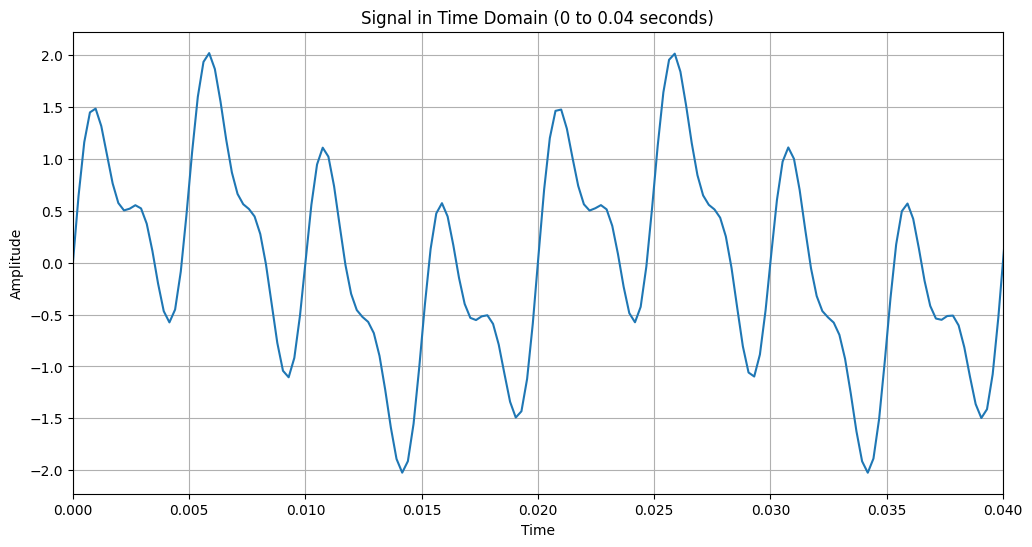

In [53]:
# Generate time values
time = np.linspace(0, 1, fs + 1)

# Generate signal values for the given time range
xt = [x(t_) for t_ in time]

# Plotting the input signal in time domain
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time, xt)
ax.set_xlim(0, 0.04)  # Limiting x-axis to [0, 0.04]
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Signal in Time Domain (0 to 0.04 seconds)')
plt.grid()
plt.show()

Q: Complete the python code for plotting ***absolute*** value of the Fourier transform of 𝑥(𝑡), that is 𝑋𝜔
 against the angular frequency 𝜔. Execute the cell and sketch the result. [Graded]

<ipython-input-54-aed6a439da7f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) + (r'$\pi$' if i != 0 else '') for i in np.arange(-1200,1210,400)])


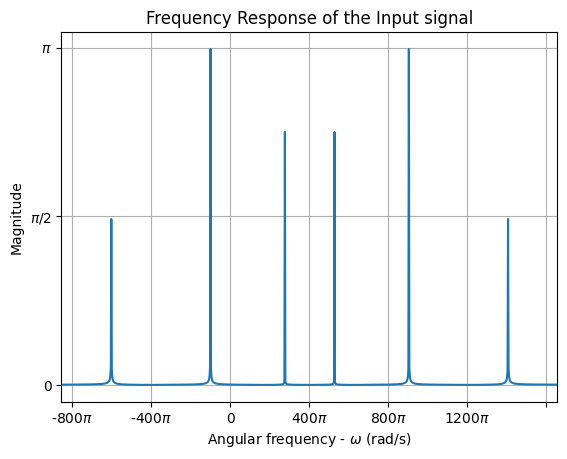

In [54]:

# Plotting the input signal in frequency domain


# Your code for plotting the absolute value of the Fourier transform
Xw = fft(xt, 4096) * 2 * np.pi / fs
Xw = fftshift(Xw)
k = np.arange(1, 4097)
w = k / 4096 * ws - ws / 2
fig, ax = plt.subplots()
xw_ab = np.abs(Xw)  # Absolute value of the Fourier transform
ax.plot(w, xw_ab)

# Set plot title and labels
ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency - ' + r'$\omega$ (rad/s)')
ax.set_ylabel('Magnitude')

# Set x-axis ticks and labels
xticks = np.arange(-1000 * np.pi, 1000 * np.pi + 1, 400 * np.pi)

ax.set_xticklabels([str(i) + (r'$\pi$' if i != 0 else '') for i in np.arange(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
# Set y-axis ticks and labels
ax.set_yticks([0, np.pi / 2, np.pi])
ax.set_yticklabels([0, r'$\pi$/2', r'$\pi$'])

# Show grid
plt.grid()



 Q: Complete the function, ideal_filter(w) to output the (𝜔 )

In [55]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2
def ideal_filter(w):
  # Your code goes here
  gain = 1
  if wc1>=abs(w) or wc2<=abs(w):
    gain=0
  return gain

 Q: Use the ideal_filter(w) function to fill the list 0 , with the ideal filter value for each
�
�
 𝐻 𝑤
 element in . Complete the following code and sketch the output below

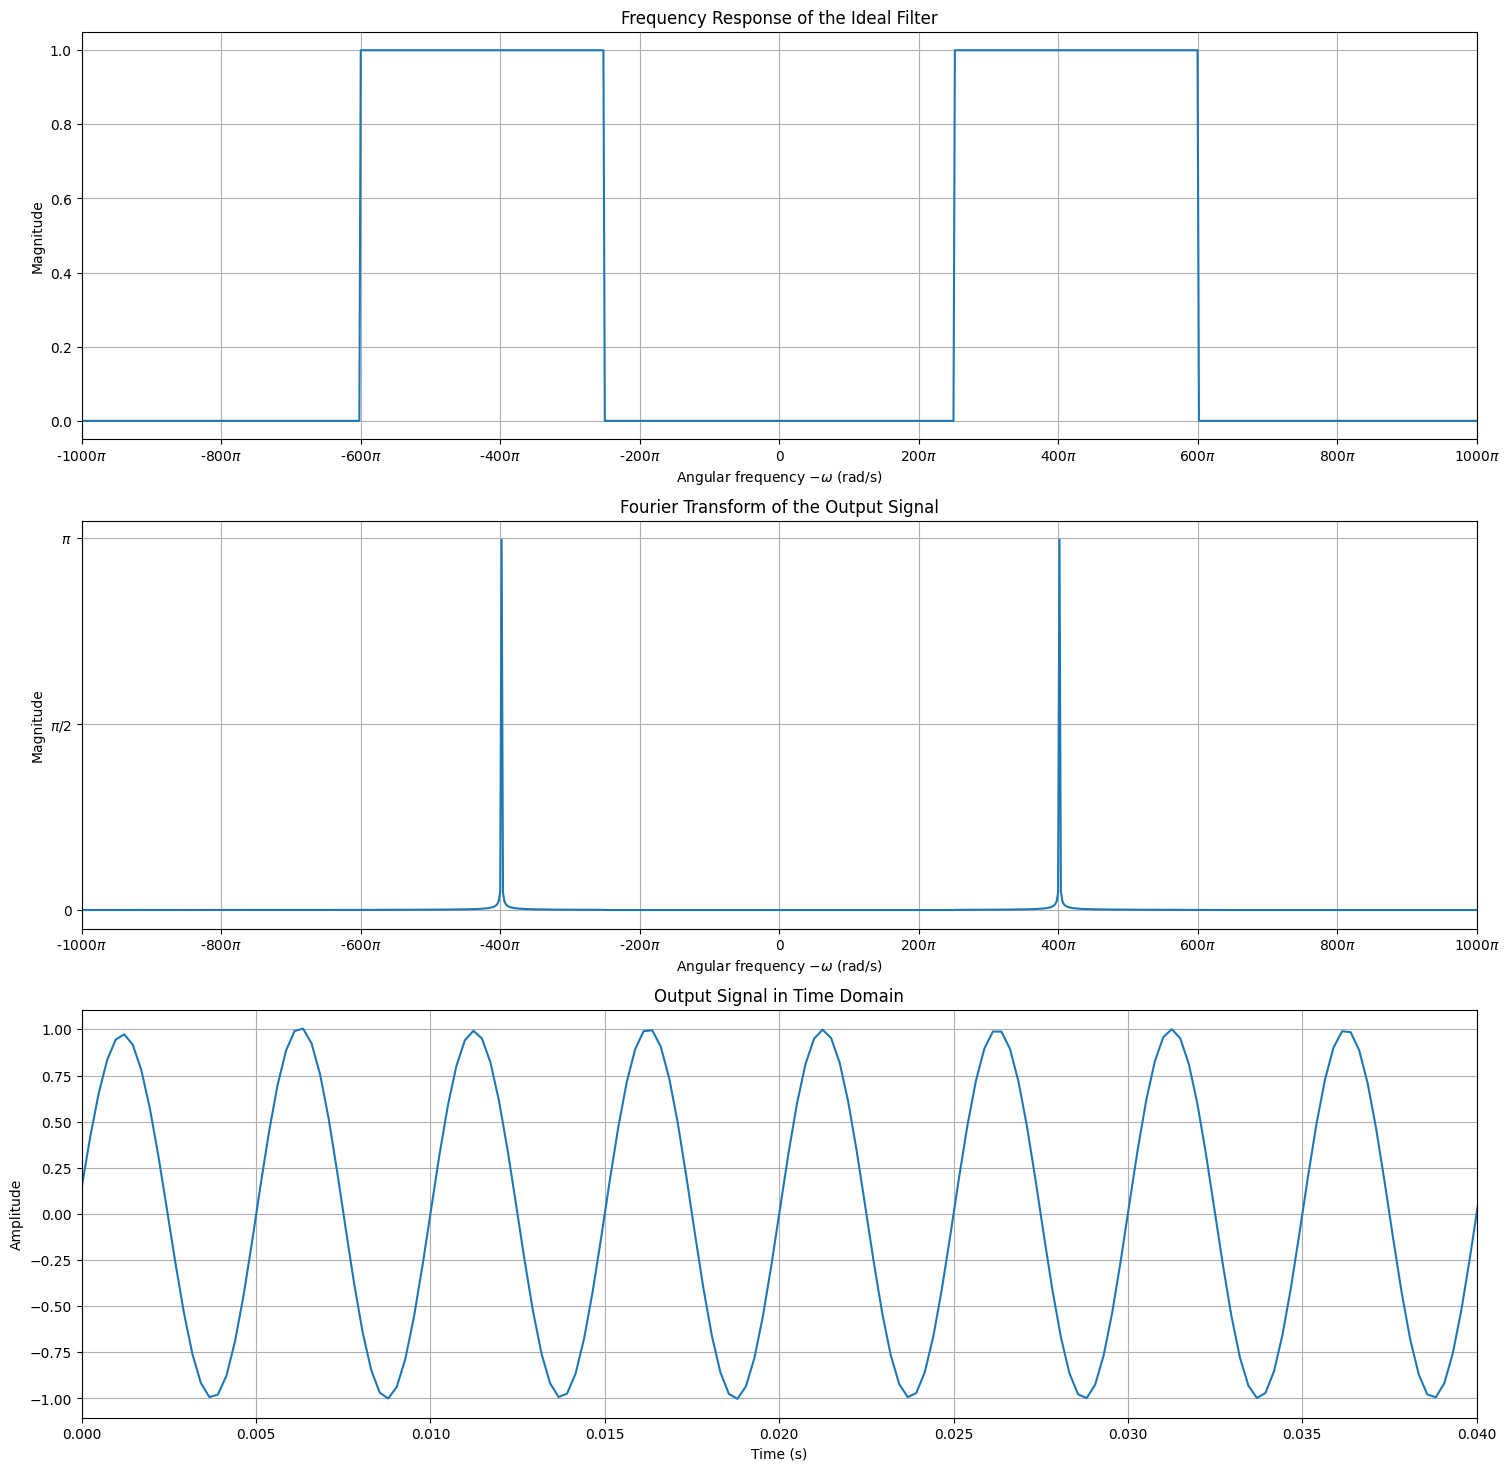

In [56]:
# Calculate angular frequencies
k = np.arange(1, 4097)
w = k / 4096 * ws - ws / 2

# Initialize array to store ideal filter frequency response
H0w = []

# Calculate ideal filter frequency response for each angular frequency
for i in w:
    H0w.append(ideal_filter(i))

# Simulate filtering by element-wise multiplication
Y0w = np.multiply(Xw, H0w)

# Obtain the time domain signal by inverse FFT
y0t = ifft(fftshift(Y0w * fs / (2 * np.pi)))

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# Frequency response of the ideal filter
axes[0].plot(w, H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency −' + r'$\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200 * np.pi, 1200 * np.pi + 1, 200 * np.pi))
axes[0].set_xticklabels([str(i) + (r'$\pi$' if i else '') for i in range(-1200, 1210, 200)])
axes[0].set_xlim(-1000 * np.pi, 1000 * np.pi)
axes[0].grid()

# Fourier transform of the output signal
axes[1].plot(w, abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −' + r'$\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200 * np.pi, 1200 * np.pi + 1, 200 * np.pi))
axes[1].set_xticklabels([str(i) + (r'$\pi$' if i else '') for i in range(-1200, 1210, 200)])
axes[1].set_xlim(-1000 * np.pi, 1000 * np.pi)
axes[1].set_yticks([0, np.pi / 2, np.pi])
axes[1].set_yticklabels([0, r'$\pi$/2', r'$\pi$'])
axes[1].grid()

# Output signal in time domain
axes[2].plot(time, np.real(y0t))
axes[2].set_title('Output Signal in Time Domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

plt.show()


2.3.2 Ideal Filter: Part B

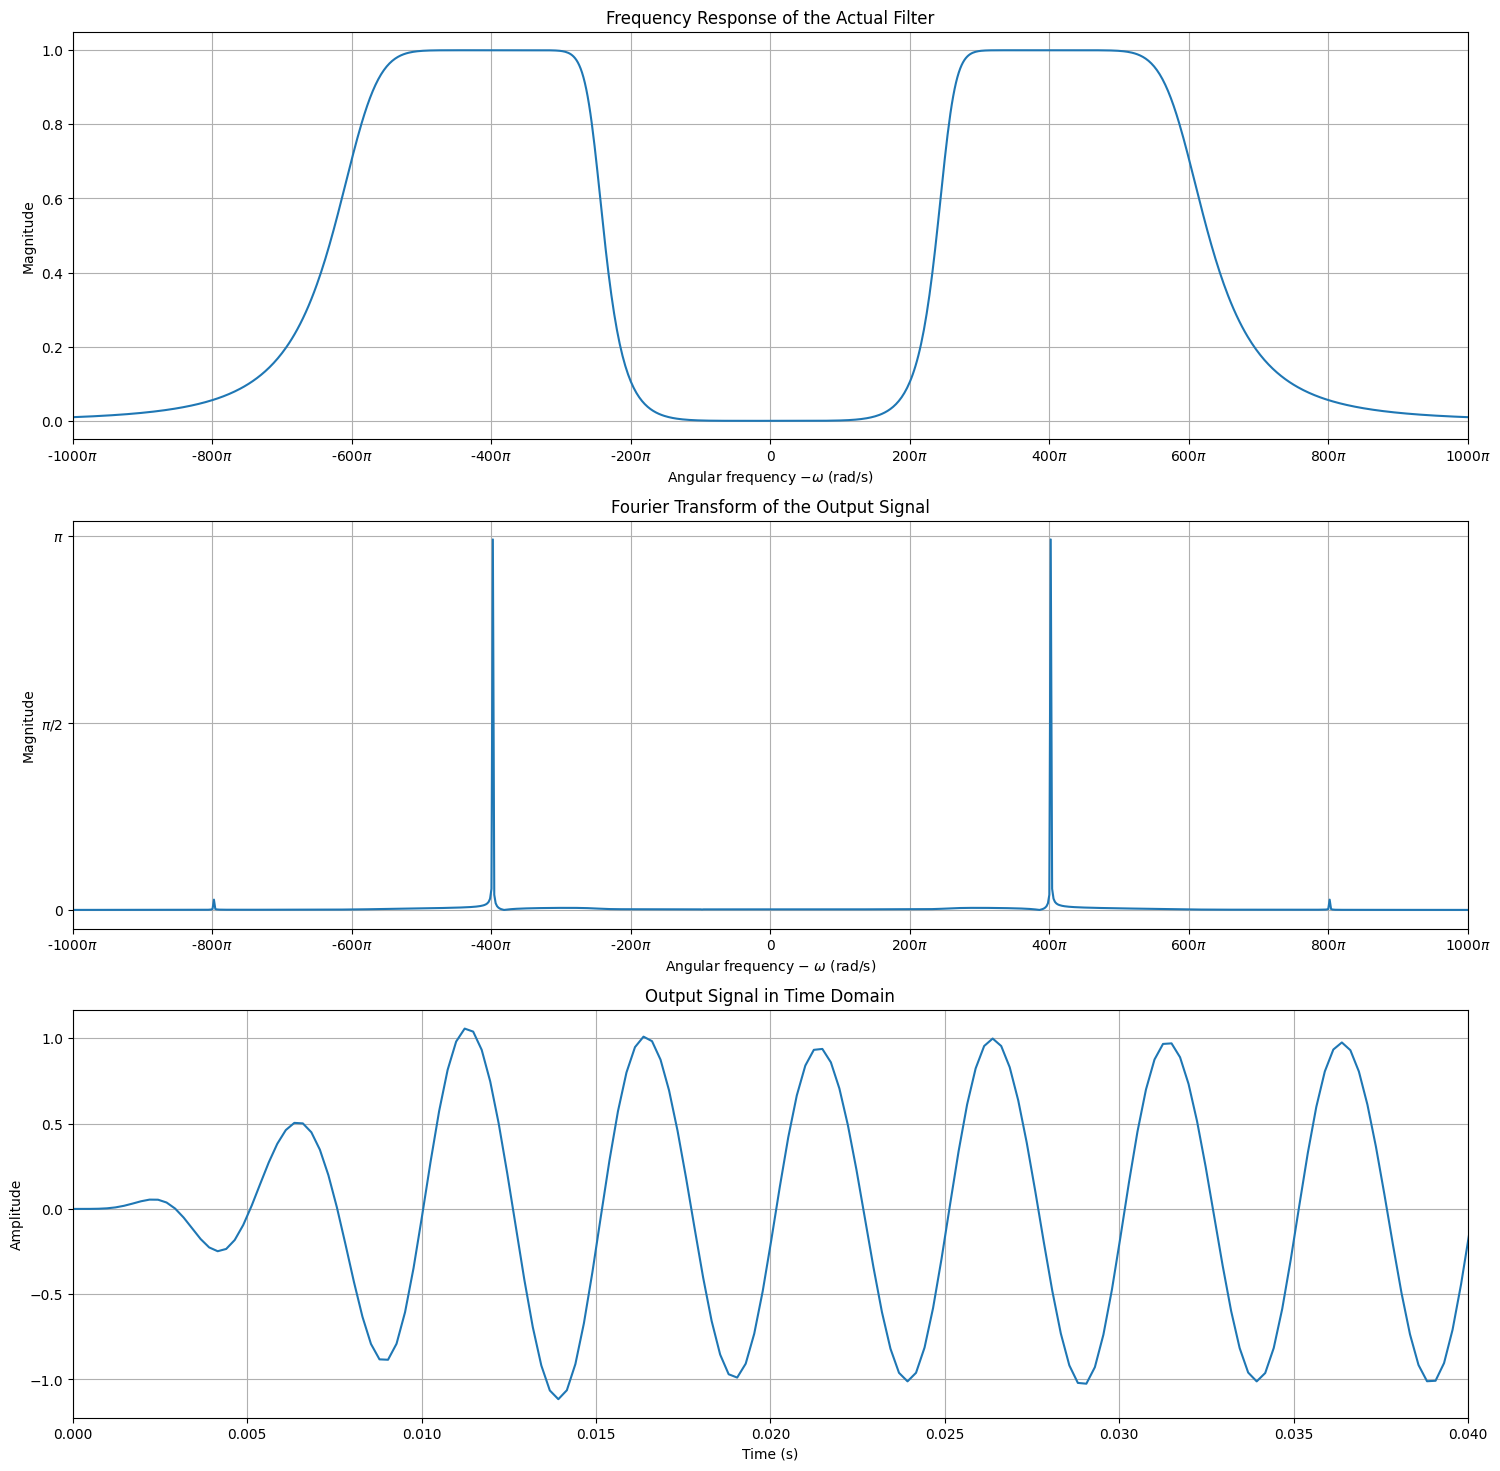

In [67]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww) * ws / (2 * np.pi)
h = np.append(np.flipud(h), h)

# Filtering
y = signal.lfilter(b, a, xt)

# Adjusting the time array to match the length of the output signal array
time = np.linspace(0, len(y) - 1, len(y)) * (1 / fs)

# Obtaining the frequency response of the output signal
Y = fft(y, 4096) * 2 * np.pi / fs
Y = fftshift(Y)

# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3, 1, figsize=(18, 18))
axes[0].plot(ww, abs(h))
axes[0].set_xlabel('Angular frequency −' + r'$\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200 * np.pi, 1200 * np.pi + 1, 200 * np.pi))
axes[0].set_xticklabels([str(i) + (r'$\pi$' if i else '') for i in range(-1200, 1210, 200)])
axes[0].set_xlim(-1000 * np.pi, 1000 * np.pi)
axes[0].grid()

# Frequency response of the actual filter output (magnitude)
axes[1].plot(w, abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −' + r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200 * np.pi, 1200 * np.pi + 1, 200 * np.pi))
axes[1].set_xticklabels([str(i) + (r'$\pi$' if i else '') for i in range(-1200, 1210, 200)])
axes[1].set_xlim(-1000 * np.pi, 1000 * np.pi)
axes[1].set_yticks([0, np.pi / 2, np.pi])
axes[1].set_yticklabels([0, r'$\pi$/2', r'$\pi$'])
axes[1].grid()

# Output signal in time domain
axes[2].plot(time, np.real(y))
axes[2].set_title('Output Signal in Time Domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
plt.show()


Q: Comment on your observations in Part - A and Part - B

Only 400π frequency passes through the ideal filter while 400π and some parts of 800π frequencies passes through the actual filter. So, the output signal is not a perfect sinusoid for the actual filter

2.4 Removing Power Line Noise in an ECG Signal

Task 1 Write a python script to read the data in the file ecg_signal.csv and fill the list ecg with the data.

In [60]:
# Reading the ECG data
ecg = np.loadtxt("/content/ecg_signal.csv")
duration = 10  # seconds
T = duration / len(ecg)
Fs = 1 / T

# Obtaining the Fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs / 2, Fs / 2, len(F))


Task 2 Plot the absolute value of the Fourier transform with respect to frequency. Limit the 𝑥-axis to the interval
 [−100, 100]. Sketch the output.

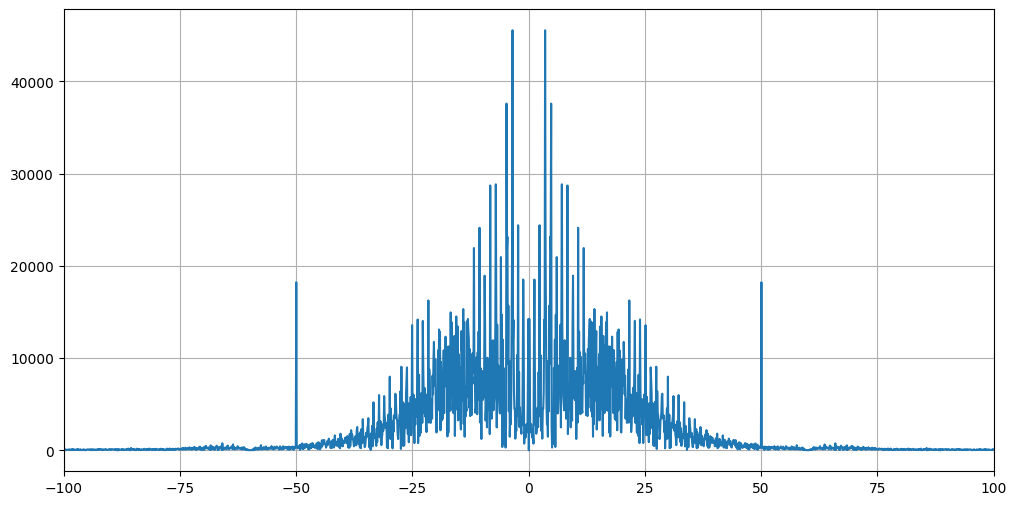

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(fr, abs(F))
ax.set_xlim(-100, 100)
plt.grid()
plt.show()


 Task 3 What type of filter that can be used to remove the noise at 50 Hz? Band-stop filter

Task 4. Edit the code below with the correct name of the filter selecting from the table given below. Execute the cell
 and sketch the frequency response of the filter.

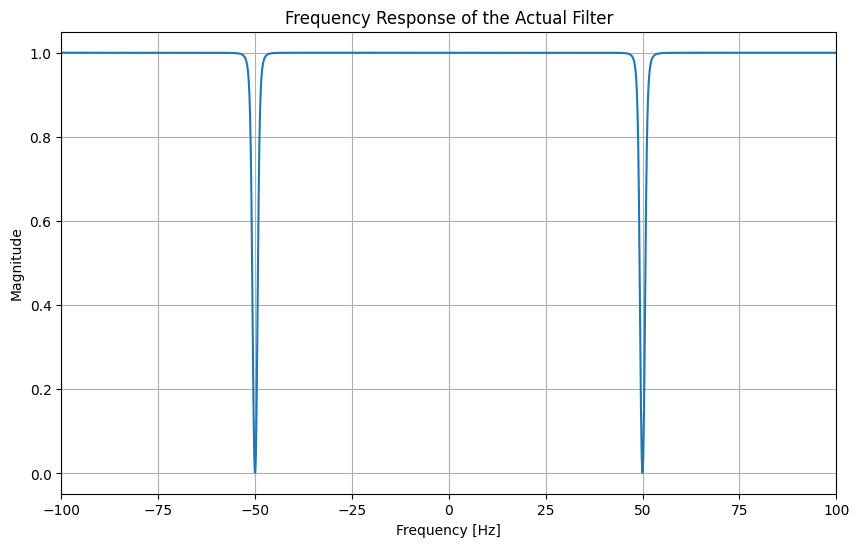

In [62]:
# Designing the filter
f1 = 49
f2 = 51
filter_type = 'bandstop'  # EDIT HERE
b, a = signal.butter(2, [2 * f1 / Fs, 2 * f2 / Fs], filter_type, analog=False)

# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)

# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ww * Fs / (2 * np.pi), abs(h))
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100, 100)
ax.grid()
plt.show()


 Task 5. Edit the given below to plot the input and the output waveforms vs time. Use the subplots function to plot the
 graphs in two axes in the same figure. Limit the 𝑥-axis to the interval [0,3]. Sketch the result.

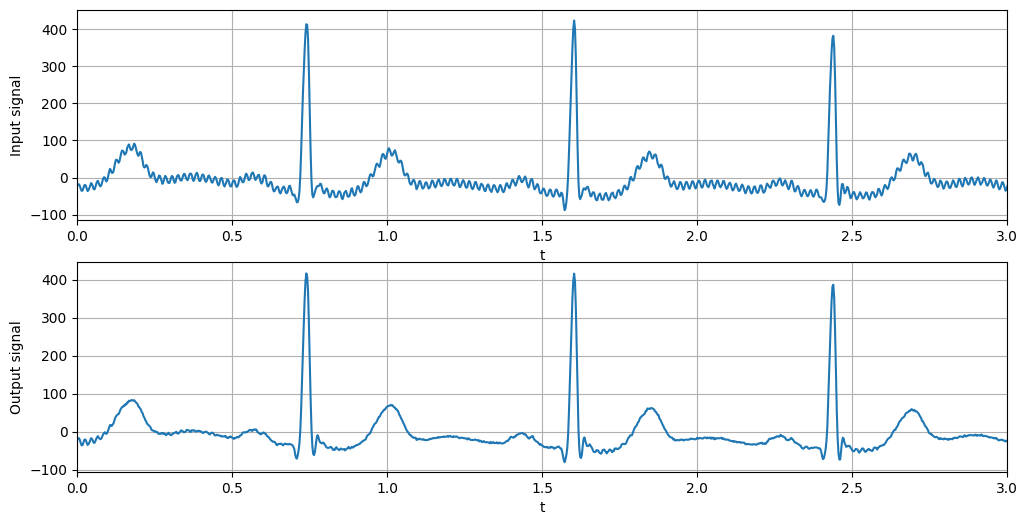

In [63]:
time = np.arange(T, duration + T, T)

# Filtering the ECG waveform
output = signal.lfilter(b, a, ecg)

# Plotting the input and output waveforms vs time
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes[0].plot(time, ecg)
axes[0].set_xlabel("t")
axes[0].set_ylabel("Input signal")
axes[0].set_xlim(0, 3)
axes[0].grid()

axes[1].plot(time, output)
axes[1].set_xlabel("t")
axes[1].set_ylabel("Output signal")
axes[1].set_xlim(0, 3)
axes[1].grid()

plt.show()


 Task 6. Complete the code in below to plot the absolute value of Fourier transform of the output waveform with respect
 to the frequency. Limit the x axis to the interval [−100,100]. Execute the cell sketch the output.

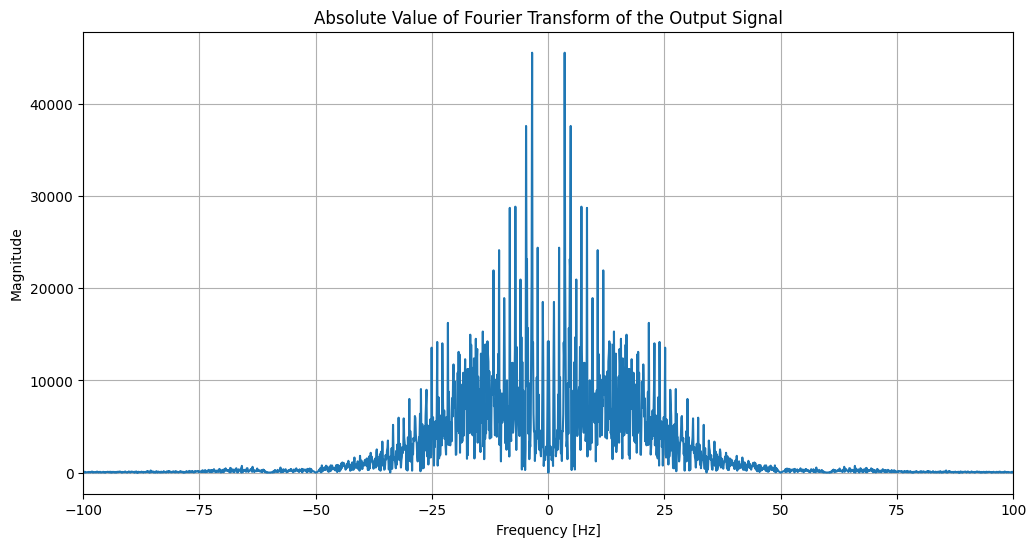

In [64]:
F = fftshift(fft(output))
fr = np.linspace(-Fs/2, Fs/2, len(F))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(fr, abs(F))
ax.set_xlim(-100, 100)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_title('Absolute Value of Fourier Transform of the Output Signal')
ax.grid()
plt.show()
